In [1]:
import glob
import os
import numpy as np
import GPX_functions
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import logging
import geopandas
import cartopy
import cartopy.mpl.ticker as cartopyticker
import cartopy.crs as ccrs
import cartopy.feature as cf
import numpy as np
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
plt.rcParams.update({'font.size': 12})
from pyproj import Proj, transform
from importlib import reload
reload(GPX_functions)
from matplotlib.font_manager import FontProperties
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))

In [2]:
figdir = "../images/Slovenia/"
if not os.path.exists(figdir):
    os.makedirs(figdir)
coordinates = (13.2, 16.7, 44.5, 46.9)
myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3], 
                              globe=None, latitude_true_scale=None)
data_crs = ccrs.PlateCarree()

In [3]:
df = geopandas.read_file("../data/Slovenia.geojson")
lonbnd, latbnd = df['geometry'].exterior[0].xy
pp = [(xx, yy) for xx,yy in zip(lonbnd[:], latbnd[:])]

In [4]:
placelist = ([13.6114321, 45.5258235, "Piran"], 
             [14.1105, 46.3683, "Bled"],
             [14.5074, 46.0529, "Ljubljana"],
             [13.7825, 46.4842, "Kranjska Gora"],
            )
             # [13.6115, 45.5283, "Strunjan"],)

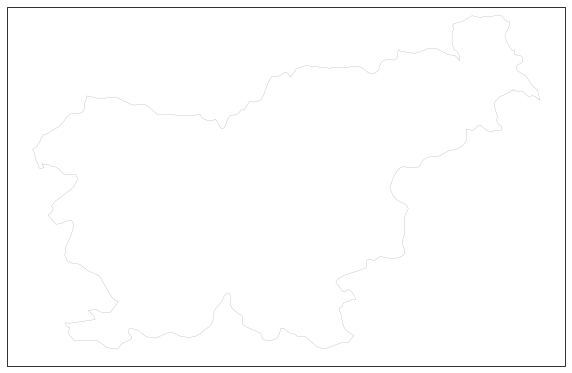

In [25]:
»

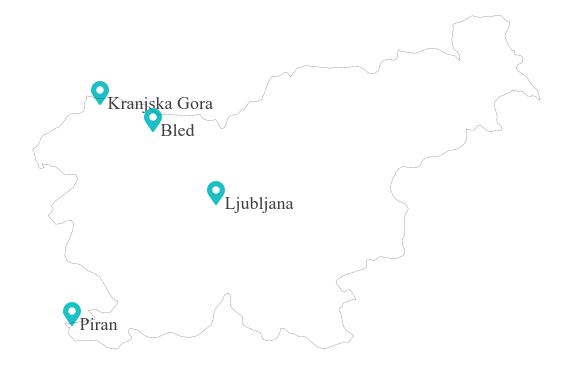

In [28]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection=myproj)
ax.plot(lonbnd, latbnd, "k--", lw=0.25, transform=data_crs, zorder=8)

for p in placelist:
    ax.text(p[0], p[1], "\uf3c5", fontproperties=fp1,
        fontsize=24, ha="center", va="bottom", zorder=7, color="#1AC0C4",
        transform=data_crs)
    t = ax.text(p[0] + 0.02, p[1], " " + p[2], fontsize=18, color=".25", ha="left", va="center",
            transform=data_crs)
    t.set_bbox(dict(facecolor='w', alpha=0.9, edgecolor='w'))
    

"""
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=7)

gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(13., 17.1, 1.))
gl.ylocator = mticker.FixedLocator(np.arange(44.5, 47., 0.5))

plt.grid(color=".75", linestyle="--", linewidth=.5)

ax.add_wms(wms='https://storitve.eprostor.gov.si/ows-elf-wms/oi/wms?service=wms&request=GetCapabilities&version=1.3.0',
               layers=['OI.OrthoimageCoverage'],
               transform=myproj, zorder=3)

    
GPX_functions.mask_outside_polygon(xvec2, yvec2, zorder=6, alpha=1, ec="w", fc="w", revert=True)
"""

ax.spines['geo'].set_color("w")
plt.savefig(os.path.join(figdir, "slovenia_map03.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [32]:
for iii, p in enumerate(placelist):
    
    fig = plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, projection=myproj)
    ax.plot(lonbnd, latbnd, "k--", lw=0.5, transform=data_crs, zorder=8)

    ax.text(p[0], p[1], "\uf3c5", fontproperties=fp1,
        fontsize=24, ha="center", va="bottom", zorder=7, color="#1AC0C4",
        transform=data_crs)
    t = ax.text(p[0] + 0.02, p[1], " " + p[2], fontsize=18, color=".25", ha="left", va="center",
            transform=data_crs)
    t.set_bbox(dict(facecolor='w', alpha=0.9, edgecolor='w'))
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=7)

    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(13., 17.1, 1.))
    gl.ylocator = mticker.FixedLocator(np.arange(44.5, 47., 0.5))

    # plt.grid(color=".75", linestyle="--", linewidth=.5)

    
    
# GPX_functions.mask_outside_polygon(xvec2, yvec2, zorder=6, alpha=1, ec="w", fc="w", revert=True)

    ax.spines['geo'].set_color("w")
    plt.savefig(os.path.join(figdir, f"slovenia_map_{iii}.jpg"), dpi=300, bbox_inches="tight")
    plt.close()

In [6]:
xvec2, yvec2 = np.array([]), np.array([])
for llon, llat in zip(lonbnd, latbnd):
    xx, yy = myproj.transform_point(llon, llat, data_crs)
    xvec2 = np.append(xvec2, xx)
    yvec2 = np.append(yvec2, yy)